In [1]:
import pandas as pd
import seaborn as sns

import sys
sys.path.append('/Users/familyafanasyevy/Documents/Денис/Skillfactory/vulnerable_populations/additional_functions')
from functions import to_modify_dataframe

##### Поскольку у нас имеется 4 идентичные таблицы о распределении малоимущего населения, напишем для начала функцию, которая будут обрабатывать эти таблицы одним и тем же образом.

In [2]:
def to_read_poverty(year: int):
    poverty_socdem = pd.read_excel(f'../social_russia_data/poverty_socdem_{year}.xls', sheet_name=0, header=2, index_col=0)
    poverty_socdem = poverty_socdem.drop(columns='Все население')
    poverty_socdem = to_modify_dataframe(poverty_socdem)
    poverty_socdem = poverty_socdem.rename(columns={
    'Дети в возрасте до 16 лет': f'Процент малоимущих среди детей до 16 лет в {year} году',
    'Население старше трудоспособного возраста': f'Процент малоимущих среди населения старше трудоспособного возраста в {year} году',
    'Население трудоспособного возраста': f'Процент малоимущих среди населения трудоспособного возраста в {year} году'
    })
    return poverty_socdem

##### Прочитаем данные о распределении малоимущего населения по социально-демографическим группам за каждый год, преобразуем их, а затем объединим.

In [3]:
poverty = [to_read_poverty(year) for year in range(2017, 2021)]
poverty_socdem = poverty[0]
for i in range(1, 4):
    poverty_socdem = poverty_socdem.merge(
        right=poverty[i],
        how='inner',
        left_index=True,
        right_index=True
    )
poverty_socdem.head()

Число регионов России - 85.
Число регионов России - 85.
Число регионов России - 85.
Число регионов России - 85.


,Процент малоимущих среди детей до 16 лет в 2017 году,Процент малоимущих среди населения старше трудоспособного возраста в 2017 году,Процент малоимущих среди населения трудоспособного возраста в 2017 году,Процент малоимущих среди детей до 16 лет в 2018 году,Процент малоимущих среди населения старше трудоспособного возраста в 2018 году,Процент малоимущих среди населения трудоспособного возраста в 2018 году,Процент малоимущих среди детей до 16 лет в 2019 году,Процент малоимущих среди населения старше трудоспособного возраста в 2019 году,Процент малоимущих среди населения трудоспособного возраста в 2019 году
Белгородская область,43.4,11.8,44.8,44.8,12.9,42.3,0.0,0.0,0.0
Брянская область,42.9,4.9,52.2,40.3,1.8,57.9,37.5,5.1,57.4
Владимирская область,34.8,8.6,56.6,48.9,8.3,42.8,34.8,4.8,60.4
Воронежская область,38.6,5.9,55.6,32.6,8.0,59.4,45.2,5.4,49.4
Ивановская область,33.2,10.9,55.9,31.2,9.5,59.3,47.5,5.0,47.5


##### Посмотрим корреляцию.

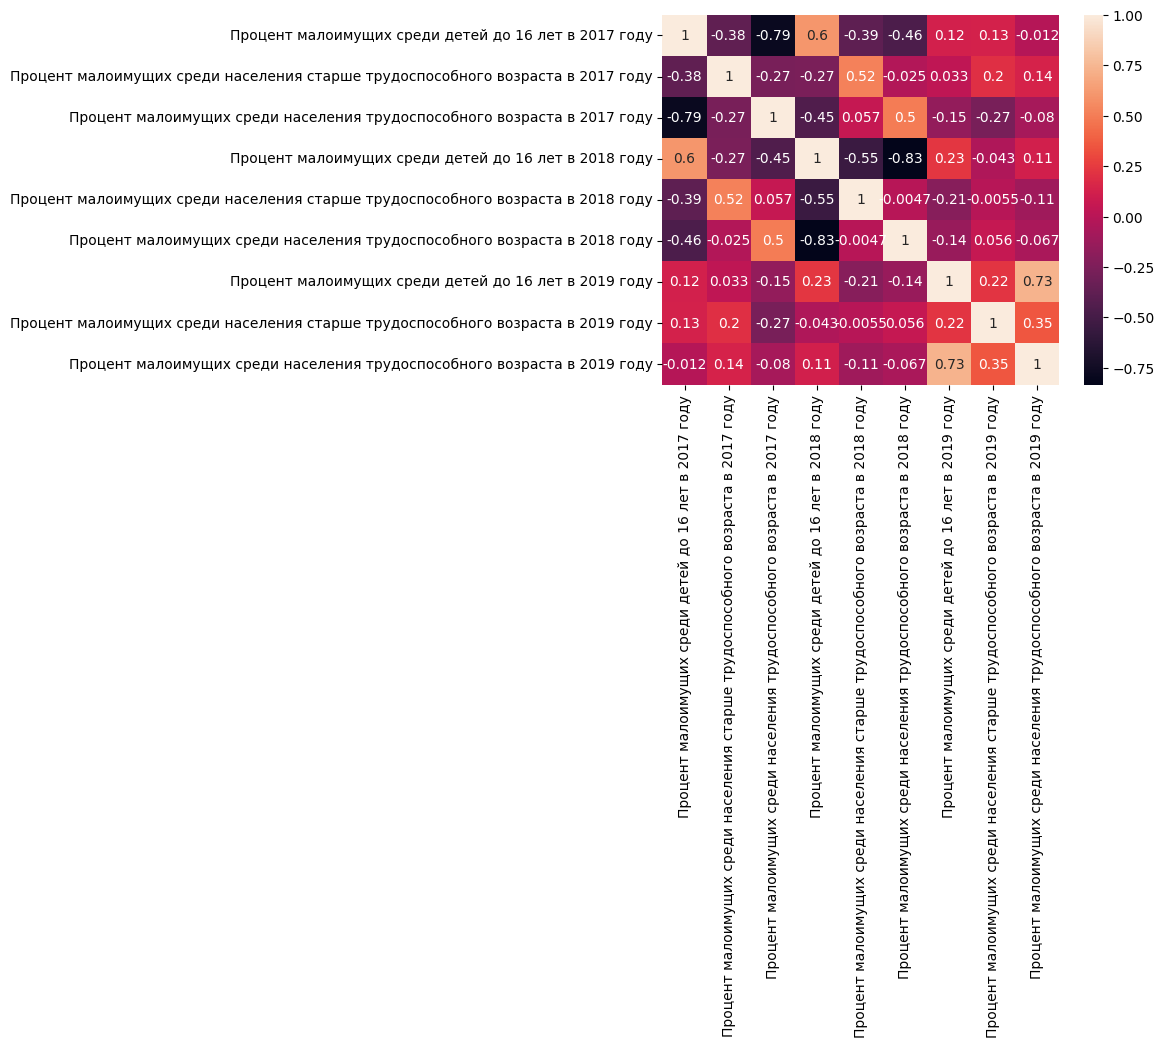

In [4]:
sns.heatmap(poverty_socdem.corr(), annot=True);

##### Признаков с высокой корреляцией не наблюдается.

In [5]:
poverty_socdem.to_csv('../datasets_mod/poverty_socdem.csv', sep=',')